# Es 1 week 9: CMB PARAMETER SENSITIVITY


See M.Tegmark - Doppler Peaks and all of that on Arxiv

https://arxiv.org/abs/astro-ph/9511148

See Nasa Goddart LAMBDA education and graphics
https://lambda.gsfc.nasa.gov/education/graphic_history/taureionzation.html

See Baumann - Cosmology 2021 (section 7.5.1)

## default values

In [1]:
import camb
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
# calculate background results:
data = camb.get_background(pars)

In [3]:
#get dictionary of CAMB power spectra
powers =data.get_cmb_power_spectra(pars, CMB_unit='muK');
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']

### separate sources

In [4]:
from camb.symbolic import *
monopole_source, ISW, doppler, quadrupole_source = get_scalar_temperature_sources()

In [5]:
conformal_times = np.linspace(1, 800, 300)
ks = [0.01,0.05]
Delta_g_N = make_frame_invariant(Delta_g, 'Newtonian')

In [6]:
# You can also calculate power spectra for custom source functions.
# For example, let's split up the standard temperature result into the various sub-terms,
# and see how they contribute to the total

early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
## I set the custom sources
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

data= camb.get_results(pars)
dic = data.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

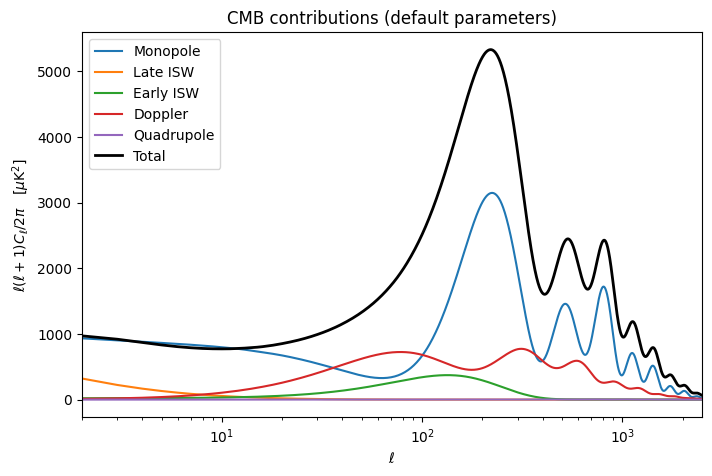

In [7]:
ls =np.arange(dic['TxT'].shape[0])
plt.figure(figsize=(8,5))
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic['LISWxLISW'], color='C1')
plt.semilogx(ls,dic['eISWxeISW'], color='C2')
plt.semilogx(ls,dic['dopxdop'],color='C3')
plt.semilogx(ls,dic['QxQ'], color='C4')
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.xlabel('$\ell$')
cl_label= r'$\ell(\ell+1)C_\ell/2\pi\quad [\mu {\rm K}^2]$'
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Late ISW','Early ISW','Doppler','Quadrupole', 'Total'], loc = 'upper left');
plt.title('CMB contributions (default parameters)');

Notice that:
- the Early ISW is peaked a litte to the left wrt the monopole peak
- the Late ISW peaks at very large scale: $\Lambda$ dominates in the late universe, accelerates the expansions and lower the gravitational potential **at late times=big scales**

## Variation of the $\Lambda$ CDM parameters


Some notes from Baumann:

We are assuming $k=0$ so this means $h=\sqrt{\omega_m/(1-\Omega_\Lambda)}$ thus a larger $H_0$ means more $Λ$

The **angular position** of the sound horizon is $\theta=r_s/d_A|_{dec}$:


*   $r_s$ only depends on pre-recombination parameters --> $\omega_c$, $ω_b$
*   the distance to last scattering $d_A$ depends on geometry and energy content --> $\Omega_k , H_0 , \Omega_\Lambda , \Omega_m$

Degeneracy --> BAOs or Supernovae

The **peak height** depends on:


1.   Diffusion damping = age of the universe ($\omega_m$) and photon mean free path( $\omega_b$ )
2.   Early ISW: residual radiation gives $\Phi'\neq 0$ -> more relative photons = more effect -> less matter = more radiation = bigger 1st peak
3.   different relative heights are a measure of $\omega_b$
4.   smaller $\omega_b/\omega_\gamma$ gives higher first peaks









**Note 1:** In a flat universe ($\Omega_k = 0$) we have $\Omega_m = 1 - \Omega_\Lambda$.
Since $\omega_m = \Omega_m h^2$, we can solve for $h$:

$$
h = \sqrt{\frac{\omega_m}{\Omega_m}} = \sqrt{\frac{\omega_m}{1 - \Omega_\Lambda}} .
$$

This relation assumes that $\omega_m$ is treated as a fixed parameter when varying $\Omega_\Lambda$.


**Note 2:** The comoving sound horizon at decoupling is defined as

$$
r_s(z_*) = \int_{z_*}^{\infty} \frac{c_s(z)}{H(z)} \, dz,
$$

where

$$
c_s(z) = \frac{c}{\sqrt{3(1+R(z))}}, \qquad
R(z) = \frac{3\rho_b(z)}{4\rho_\gamma(z)}.
$$

**Note 3:**
- **Late ISW:** contributes mainly at low multipoles ($\ell \lesssim 20$), due to the decay of the gravitational potential once dark energy dominates.  
- **Early ISW:** arises around matter–radiation equality and affects scales close to the first acoustic peak; it contributes at higher $\ell$ compared to the Late ISW.

### Variation of $H_0$


We re-compute the cosmology with H0 incremented and decremented.

Increasing $Ω_Λ$ at fixed $Ω_mh^2$, increases the Hubble rate and hence decreases the distance to last-scattering=> the peaks move towards bigger scales (left=lower multipoles=bigger scales)

In [8]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=80, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)

early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
## I set the custom sources
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

data2= camb.get_results(pars)
dic2 = data2.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

In [9]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=50, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)

early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
## I set the custom sources
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

data22= camb.get_results(pars)
dic22 = data22.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

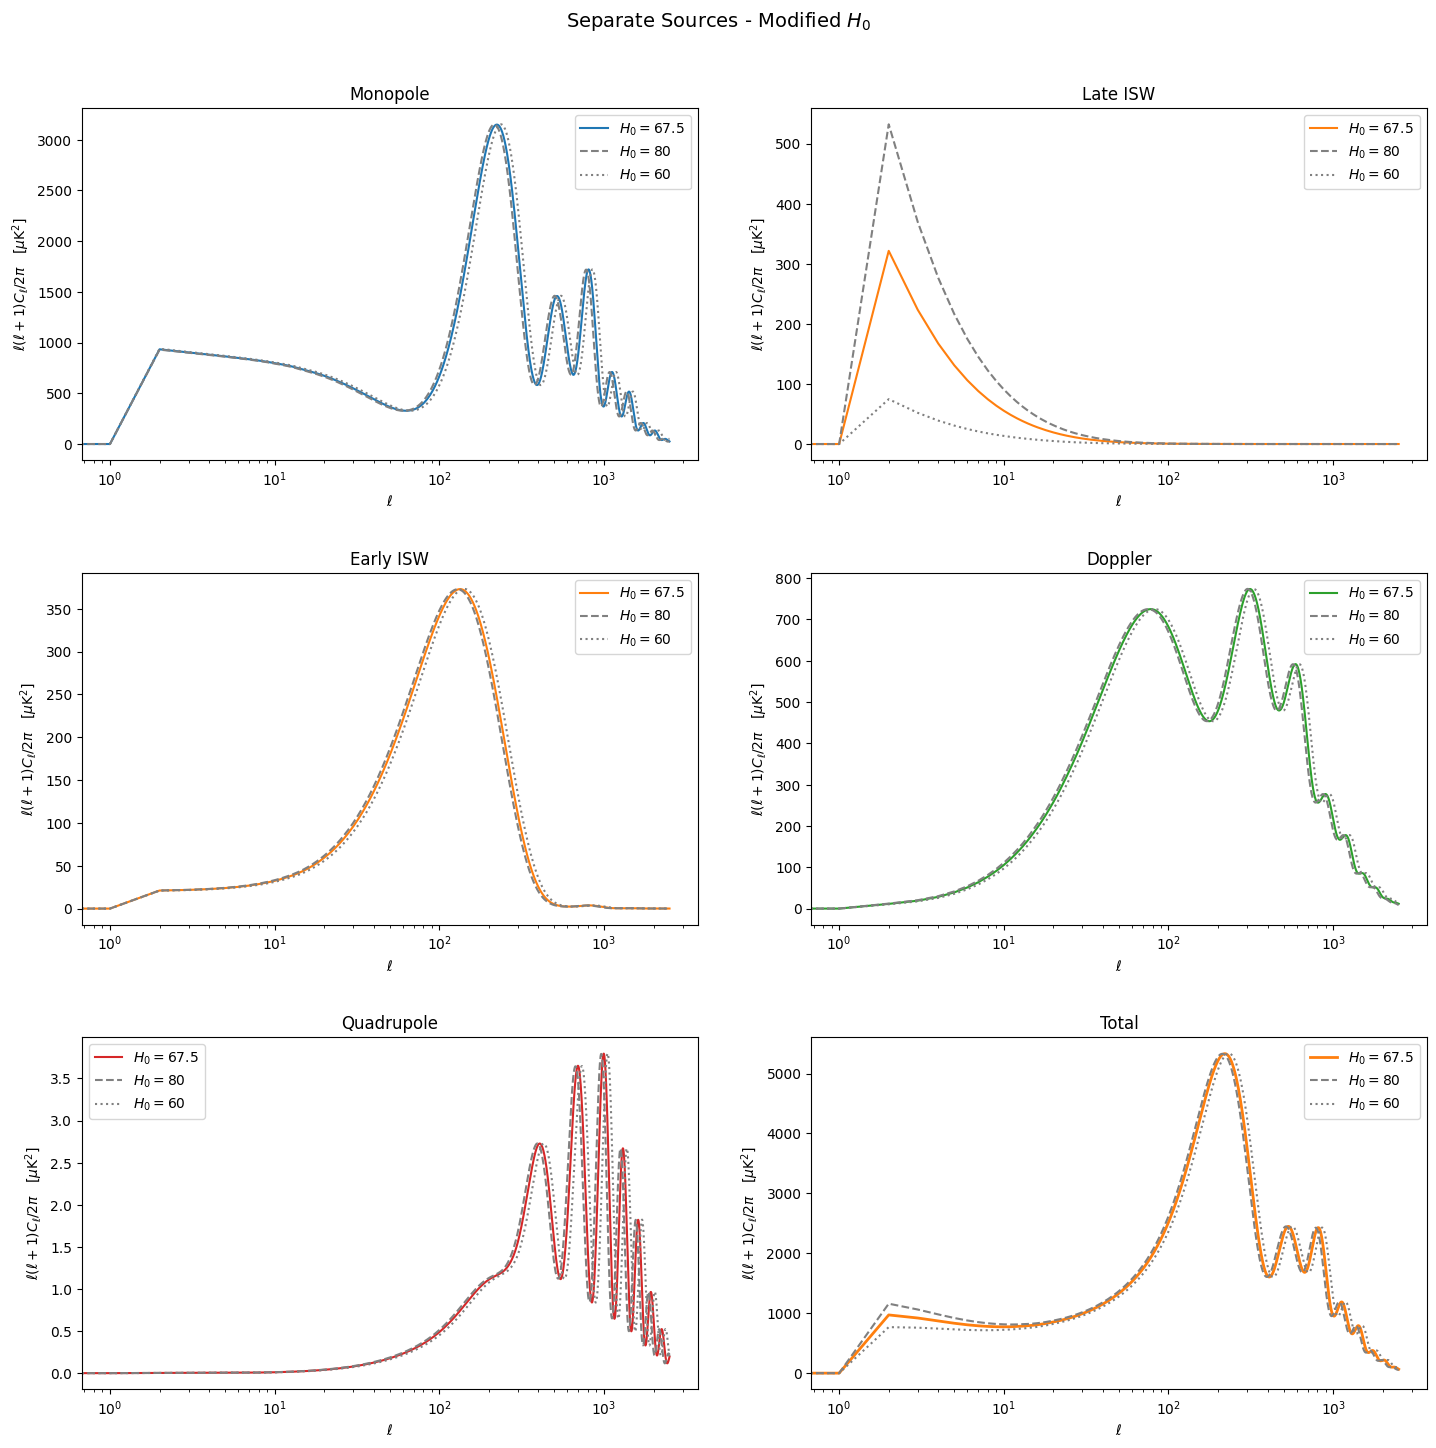

In [10]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(ncols=2, nrows=3)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Separate Sources - Modified $H_0$', fontsize=14)


#first plot
ax = fig.add_subplot(gs[0])
ax.semilogx(ls,dic['monxmon'], color='C0', label='$H_0=67.5$')
ax.semilogx(ls,dic2['monxmon'], ls='--',color='grey', label='$H_0=80$')
ax.semilogx(ls,dic22['monxmon'], ls='dotted',color='grey', label='$H_0=60$')
ax.set_title('Monopole')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[1], sharex=ax)
ax.semilogx(ls,dic['LISWxLISW'], color='C1', label='$H_0=67.5$')
ax.semilogx(ls,dic2['LISWxLISW'], ls='--',color='grey', label='$H_0=80$')
ax.semilogx(ls,dic22['LISWxLISW'], ls='dotted',color='grey', label='$H_0=60$')
ax.set_title('Late ISW')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[2], sharex=ax)
ax.semilogx(ls,dic['eISWxeISW'], color='C1', label='$H_0=67.5$')
ax.semilogx(ls,dic2['eISWxeISW'], ls='--',color='grey', label='$H_0=80$')
ax.semilogx(ls,dic22['eISWxeISW'], ls='dotted',color='grey', label='$H_0=60$')
ax.set_title('Early ISW')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[3], sharex=ax)
ax.semilogx(ls,dic['dopxdop'],color='C2', label='$H_0=67.5$')
ax.semilogx(ls,dic2['dopxdop'], ls='--',color='grey', label='$H_0=80$')
ax.semilogx(ls,dic22['dopxdop'], ls='dotted',color='grey', label='$H_0=60$')
ax.set_title('Doppler')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[4], sharex=ax)
ax.semilogx(ls,dic['QxQ'], color='C3', label='$H_0=67.5$')
ax.semilogx(ls,dic2['QxQ'], ls='--',color='grey', label='$H_0=80$')
ax.semilogx(ls,dic22['QxQ'], ls='dotted',color='grey', label='$H_0=60$')
ax.set_title('Quadrupole')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[5], sharex=ax)
ax.semilogx(ls,dic['TxT'], lw=2, color='C1', label='$H_0=67.5$')
ax.semilogx(ls,dic2['TxT'], ls='--',color='grey', label='$H_0=80$')
ax.semilogx(ls,dic22['TxT'], ls='dotted',color='grey', label='$H_0=60$')
ax.set_title('Total')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

fig.tight_layout(pad=3.0)

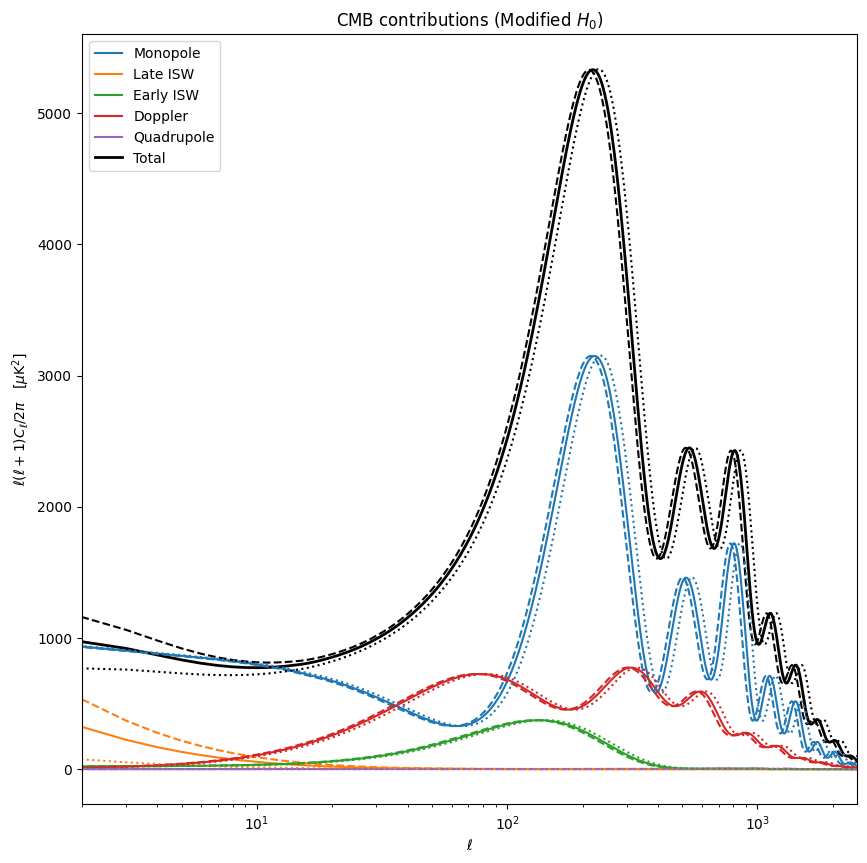

In [11]:
ls =np.arange(dic['TxT'].shape[0])
plt.figure(figsize=(10,10))
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic['LISWxLISW'], color='C1')
plt.semilogx(ls,dic['eISWxeISW'], color='C2')
plt.semilogx(ls,dic['dopxdop'],color='C3')
plt.semilogx(ls,dic['QxQ'], color='C4')
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.semilogx(ls,dic2['monxmon'], ls='--', color='C0')
plt.semilogx(ls,dic2['LISWxLISW'],ls='--', color='C1')
plt.semilogx(ls,dic2['eISWxeISW'],ls='--', color='C2')
plt.semilogx(ls,dic2['dopxdop'],ls='--',color='C3')
plt.semilogx(ls,dic2['QxQ'],ls='--', color='C4')
plt.semilogx(ls,dic2['TxT'],ls='--', color='k')
plt.semilogx(ls,dic22['monxmon'], ls='dotted', color='C0')
plt.semilogx(ls,dic22['LISWxLISW'],ls='dotted', color='C1')
plt.semilogx(ls,dic22['eISWxeISW'],ls='dotted', color='C2')
plt.semilogx(ls,dic22['dopxdop'],ls='dotted',color='C3')
plt.semilogx(ls,dic22['QxQ'],ls='dotted', color='C4')
plt.semilogx(ls,dic22['TxT'],ls='dotted', color='k')
plt.xlabel('$\ell$')
cl_label= r'$\ell(\ell+1)C_\ell/2\pi\quad [\mu {\rm K}^2]$'
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Late ISW','Early ISW','Doppler','Quadrupole', 'Total'], loc = 'upper left');
plt.title('CMB contributions (Modified $H_0$)');

If we increase $H_0$ we find a noticeable boost of power at big scales due to the LateISW Effect: more $H_0$ means more expansion => same effect as more $\Lambda$ => more potential gradients in the late universe (with fixed matter/radiation ratio).

We also see a small shift in the peaks towards the left.

The opposite happens if we decrease it.



### Variation of $\Omega_b$

We recompute the cosmology with modified $\Omega_b$.

Changes the ratio between matter and radiation => relative heights of the peaks

Changes the sound speed thus the sound horizon => different angular scale of the first peak

In [12]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.032, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)

early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
## I set the custom sources
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

data3= camb.get_results(pars)
dic3 = data3.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

In [13]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.012, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)

early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
## I set the custom sources
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

data33= camb.get_results(pars)
dic33 = data33.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

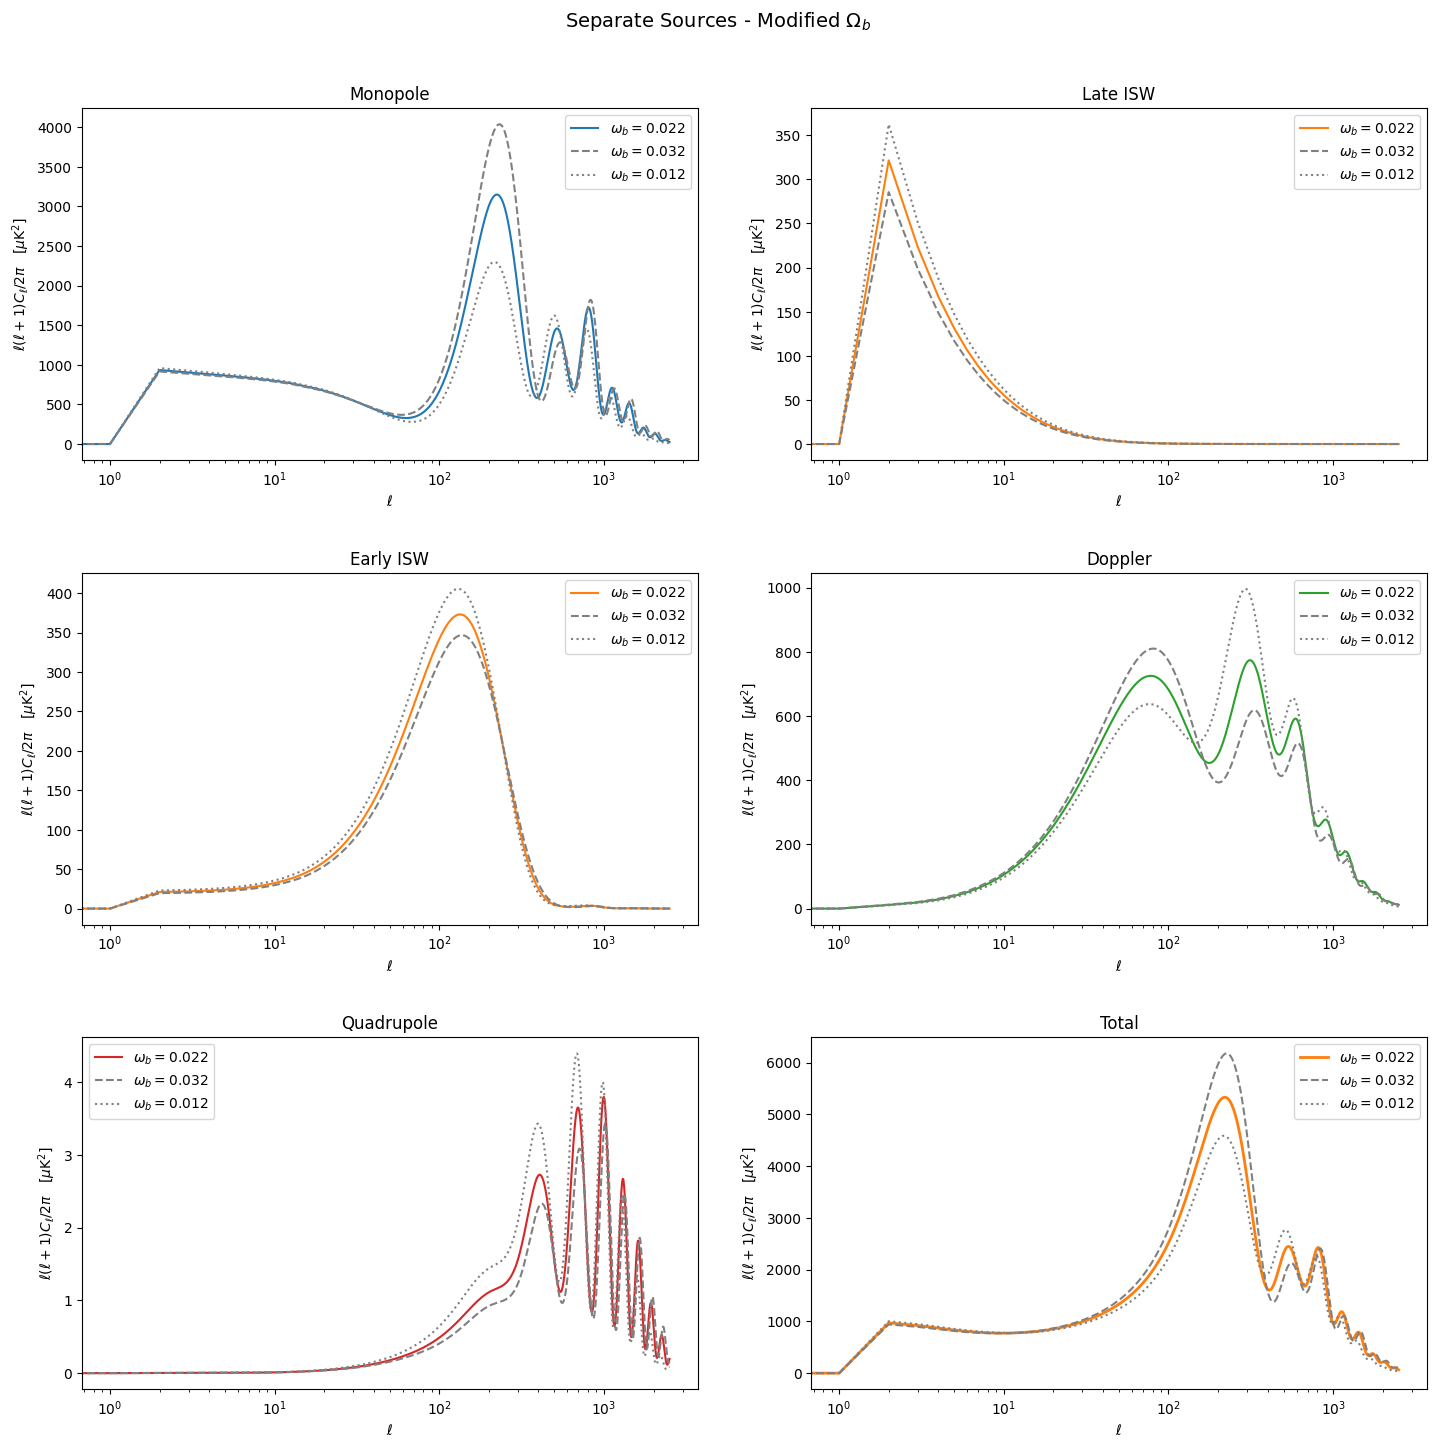

In [14]:
gs = gridspec.GridSpec(ncols=2, nrows=3)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Separate Sources - Modified $\Omega_b$', fontsize=14)


#first plot
ax = fig.add_subplot(gs[0])
ax.semilogx(ls,dic['monxmon'], color='C0',label='$\omega_b=0.022$')
ax.semilogx(ls,dic3['monxmon'], ls='--',color='grey', label='$\omega_b=0.032$')
ax.semilogx(ls,dic33['monxmon'], ls='dotted',color='grey',label='$\omega_b=0.012$')
ax.set_title('Monopole')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[1], sharex=ax)
ax.semilogx(ls,dic['LISWxLISW'], color='C1',label='$\omega_b=0.022$')
ax.semilogx(ls,dic3['LISWxLISW'], ls='--',color='grey', label='$\omega_b=0.032$')
ax.semilogx(ls,dic33['LISWxLISW'], ls='dotted',color='grey',label='$\omega_b=0.012$')
ax.set_title('Late ISW')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[2], sharex=ax)
ax.semilogx(ls,dic['eISWxeISW'], color='C1',label='$\omega_b=0.022$')
ax.semilogx(ls,dic3['eISWxeISW'], ls='--',color='grey', label='$\omega_b=0.032$')
ax.semilogx(ls,dic33['eISWxeISW'], ls='dotted',color='grey',label='$\omega_b=0.012$')
ax.set_title('Early ISW')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[3], sharex=ax)
ax.semilogx(ls,dic['dopxdop'],color='C2',label='$\omega_b=0.022$')
ax.semilogx(ls,dic3['dopxdop'], ls='--',color='grey', label='$\omega_b=0.032$')
ax.semilogx(ls,dic33['dopxdop'], ls='dotted',color='grey',label='$\omega_b=0.012$')
ax.set_title('Doppler')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[4], sharex=ax)
ax.semilogx(ls,dic['QxQ'], color='C3',label='$\omega_b=0.022$')
ax.semilogx(ls,dic3['QxQ'], ls='--',color='grey', label='$\omega_b=0.032$')
ax.semilogx(ls,dic33['QxQ'], ls='dotted',color='grey',label='$\omega_b=0.012$')
ax.set_title('Quadrupole')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[5], sharex=ax)
ax.semilogx(ls,dic['TxT'], lw=2, color='C1',label='$\omega_b=0.022$')
ax.semilogx(ls,dic3['TxT'], ls='--',color='grey', label='$\omega_b=0.032$')
ax.semilogx(ls,dic33['TxT'], ls='dotted',color='grey',label='$\omega_b=0.012$')
ax.set_title('Total')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

fig.tight_layout(pad=3.0)

Increasing the baryon relative density we have

- higher principal compression peak (bigger monopole contribution: more matter => more aggregation)
- smaller second peak => more differences in height (as expected for baryon loading)
- less quadrupole
- different doppler
- little less ISW (more baryons means smaller radiation/matter ratio)



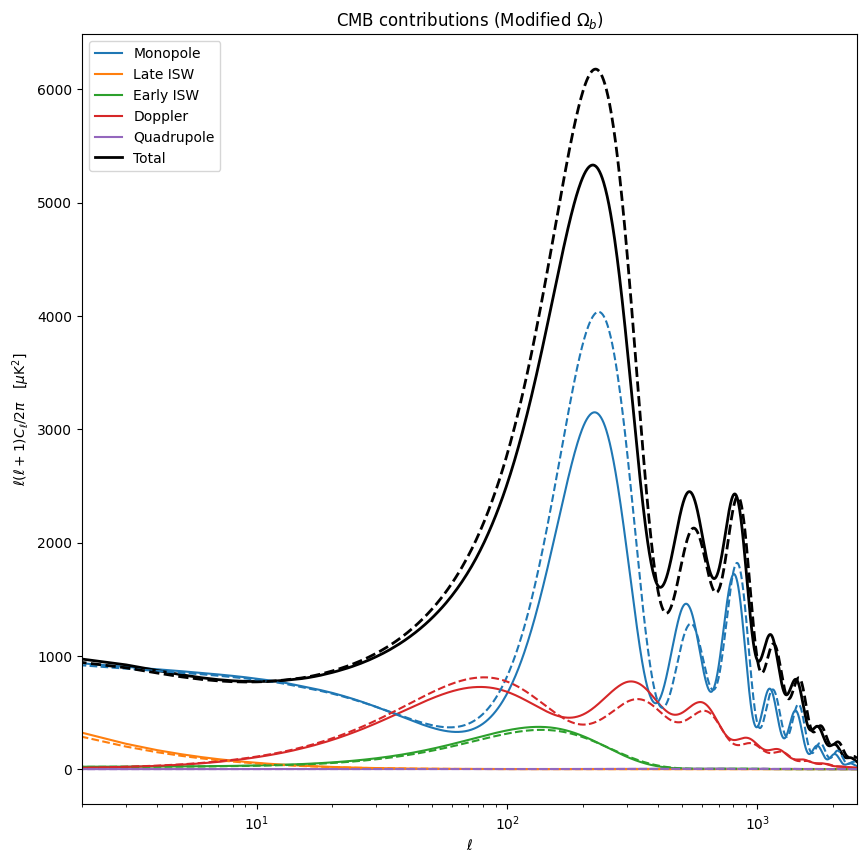

In [15]:
ls =np.arange(dic['TxT'].shape[0])
plt.figure(figsize=(10,10))
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic['LISWxLISW'], color='C1')
plt.semilogx(ls,dic['eISWxeISW'], color='C2')
plt.semilogx(ls,dic['dopxdop'],color='C3')
plt.semilogx(ls,dic['QxQ'], color='C4')
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.semilogx(ls,dic3['monxmon'], ls='--', color='C0')
plt.semilogx(ls,dic3['LISWxLISW'],ls='--', color='C1')
plt.semilogx(ls,dic3['eISWxeISW'],ls='--', color='C2')
plt.semilogx(ls,dic3['dopxdop'],ls='--',color='C3')
plt.semilogx(ls,dic3['QxQ'],ls='--', color='C4')
plt.semilogx(ls,dic3['TxT'],ls='--', lw=2, color='k')
plt.xlabel('$\ell$')
cl_label= r'$\ell(\ell+1)C_\ell/2\pi\quad [\mu {\rm K}^2]$'
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Late ISW','Early ISW','Doppler','Quadrupole', 'Total'], loc = 'upper left');
plt.title('CMB contributions (Modified $\Omega_b$)');

Raising the baryon relative density we have

- higher principal compression peak (bigger monopole contribution: more matter => more aggregation)
- smaller second peak => more differences in height (as expected for baryon loading)

- different doppler
- little less ISW



### Variation of $\Omega_c$

We recompute the cosmology with $\Omega_c$ incremented and decremented


Changing DM should change:
1.  the angular position of the first peak
2.  the equality epoch ( more DM earlier equality, less DM=later equality=more radiation driving=higher peak)
3.  the radiation/matter ratio => ISW (more ISW with less DM, less ISW with more DM)

In [16]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.142, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)

early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
## I set the custom sources
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

data4= camb.get_results(pars)
dic4 = data4.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

In [17]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.08, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)

early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
## I set the custom sources
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

data44= camb.get_results(pars)
dic44 = data44.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

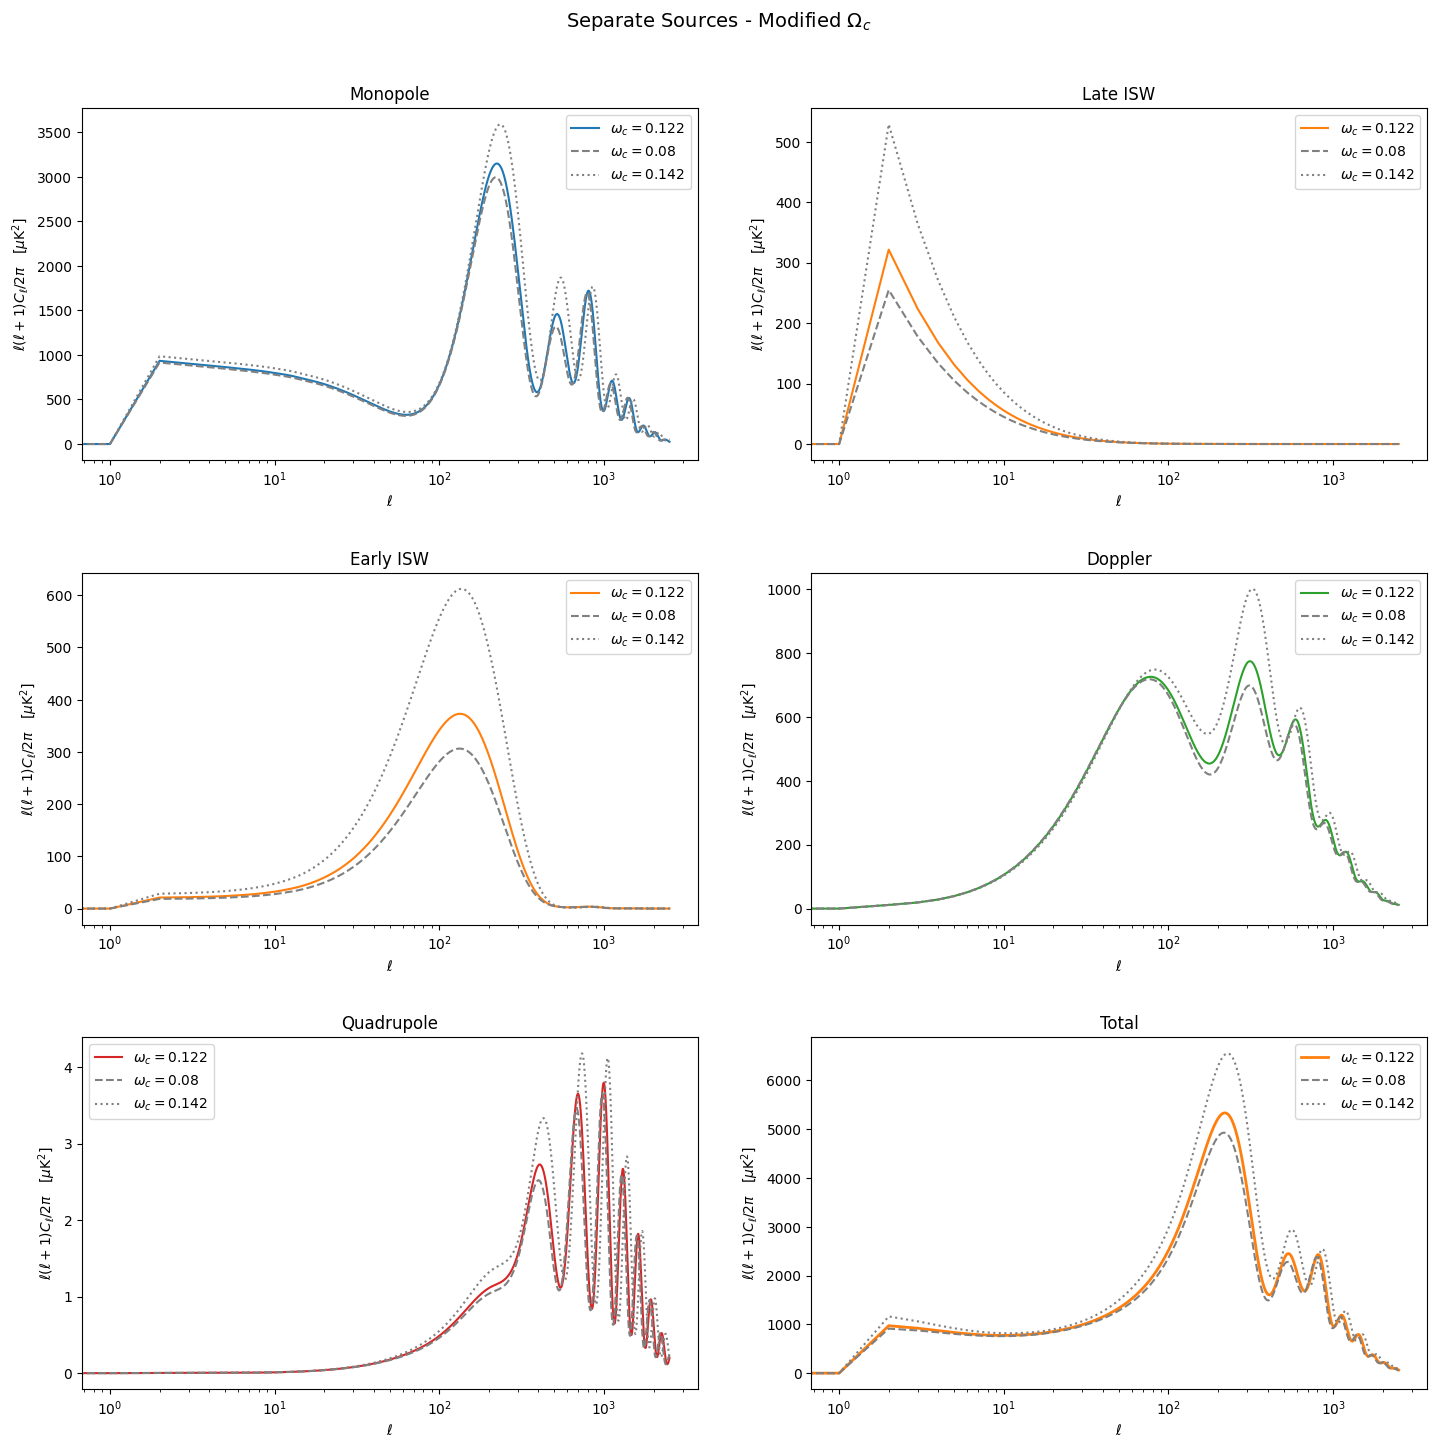

In [18]:
gs = gridspec.GridSpec(ncols=2, nrows=3)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Separate Sources - Modified $\Omega_c$', fontsize=14)


#first plot
ax = fig.add_subplot(gs[0])
ax.semilogx(ls,dic['monxmon'], color='C0', label='$\omega_c=0.122$')
ax.semilogx(ls,dic4['monxmon'], ls='--',color='grey',label='$\omega_c=0.08$')
ax.semilogx(ls,dic44['monxmon'], ls='dotted',color='grey',label='$\omega_c=0.142$')
ax.set_title('Monopole')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[1], sharex=ax)
ax.semilogx(ls,dic['LISWxLISW'], color='C1',label='$\omega_c=0.122$')
ax.semilogx(ls,dic4['LISWxLISW'], ls='--',color='grey',label='$\omega_c=0.08$')
ax.semilogx(ls,dic44['LISWxLISW'], ls='dotted',color='grey',label='$\omega_c=0.142$')
ax.set_title('Late ISW')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[2], sharex=ax)
ax.semilogx(ls,dic['eISWxeISW'], color='C1',label='$\omega_c=0.122$')
ax.semilogx(ls,dic4['eISWxeISW'], ls='--',color='grey',label='$\omega_c=0.08$')
ax.semilogx(ls,dic44['eISWxeISW'], ls='dotted',color='grey',label='$\omega_c=0.142$')
ax.set_title('Early ISW')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[3], sharex=ax)
ax.semilogx(ls,dic['dopxdop'],color='C2',label='$\omega_c=0.122$')
ax.semilogx(ls,dic4['dopxdop'], ls='--',color='grey',label='$\omega_c=0.08$')
ax.semilogx(ls,dic44['dopxdop'], ls='dotted',color='grey',label='$\omega_c=0.142$')
ax.set_title('Doppler')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[4], sharex=ax)
ax.semilogx(ls,dic['QxQ'], color='C3',label='$\omega_c=0.122$')
ax.semilogx(ls,dic4['QxQ'], ls='--',color='grey',label='$\omega_c=0.08$')
ax.semilogx(ls,dic44['QxQ'], ls='dotted',color='grey',label='$\omega_c=0.142$')
ax.set_title('Quadrupole')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[5], sharex=ax)
ax.semilogx(ls,dic['TxT'], lw=2, color='C1',label='$\omega_c=0.122$')
ax.semilogx(ls,dic4['TxT'], ls='--',color='grey',label='$\omega_c=0.08$')
ax.semilogx(ls,dic44['TxT'], ls='dotted',color='grey',label='$\omega_c=0.142$')
ax.set_title('Total')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()


fig.tight_layout(pad=3.0)

1.  less DM gives much more ISW (there is much more relative radiation)
2.  less DM makes the 1st compression peak bigger: less DM= more relative radiation => equality happens later => more time to have radiation driving => higher peak

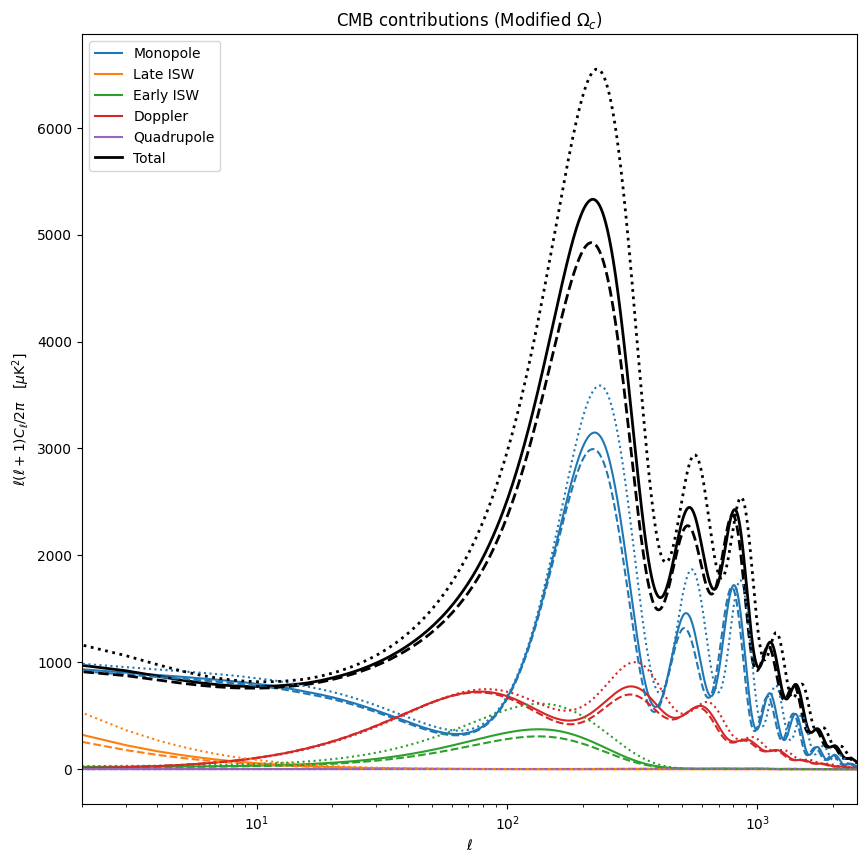

In [19]:
ls =np.arange(dic['TxT'].shape[0])
plt.figure(figsize=(10,10))
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic['LISWxLISW'], color='C1')
plt.semilogx(ls,dic['eISWxeISW'], color='C2')
plt.semilogx(ls,dic['dopxdop'],color='C3')
plt.semilogx(ls,dic['QxQ'], color='C4')
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.semilogx(ls,dic4['monxmon'], ls='--', color='C0')
plt.semilogx(ls,dic4['LISWxLISW'],ls='--', color='C1')
plt.semilogx(ls,dic4['eISWxeISW'],ls='--', color='C2')
plt.semilogx(ls,dic4['dopxdop'],ls='--',color='C3')
plt.semilogx(ls,dic4['QxQ'],ls='--', color='C4')
plt.semilogx(ls,dic4['TxT'],ls='--', lw=2, color='k')
plt.semilogx(ls,dic44['monxmon'], ls='dotted', color='C0')
plt.semilogx(ls,dic44['LISWxLISW'],ls='dotted', color='C1')
plt.semilogx(ls,dic44['eISWxeISW'],ls='dotted', color='C2')
plt.semilogx(ls,dic44['dopxdop'],ls='dotted',color='C3')
plt.semilogx(ls,dic44['QxQ'],ls='dotted', color='C4')
plt.semilogx(ls,dic44['TxT'],ls='dotted', lw=2, color='k')
plt.xlabel('$\ell$')
cl_label= r'$\ell(\ell+1)C_\ell/2\pi\quad [\mu {\rm K}^2]$'
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Late ISW','Early ISW','Doppler','Quadrupole', 'Total'], loc = 'upper left');
plt.title('CMB contributions (Modified $\Omega_c$)');

1.  less DM gives much more ISW (there is much more relative radiation)
2.  less DM makes the 1st compression peak bigger: less DM= more relative radiation => equality happens later => more time to have radiation driving => higher peak


### Variation of $n_s$

Since it encodes the tilt of the power law of primordial fluctuations (aka how much power at each scale), variation of n_s redistribute energy between large and small scales

In [20]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=1.25, r=0)

early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
## I set the custom sources
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

data5= camb.get_results(pars)
dic5 = data5.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

In [21]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.73, r=0)

early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
## I set the custom sources
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

data55= camb.get_results(pars)
dic55 = data55.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

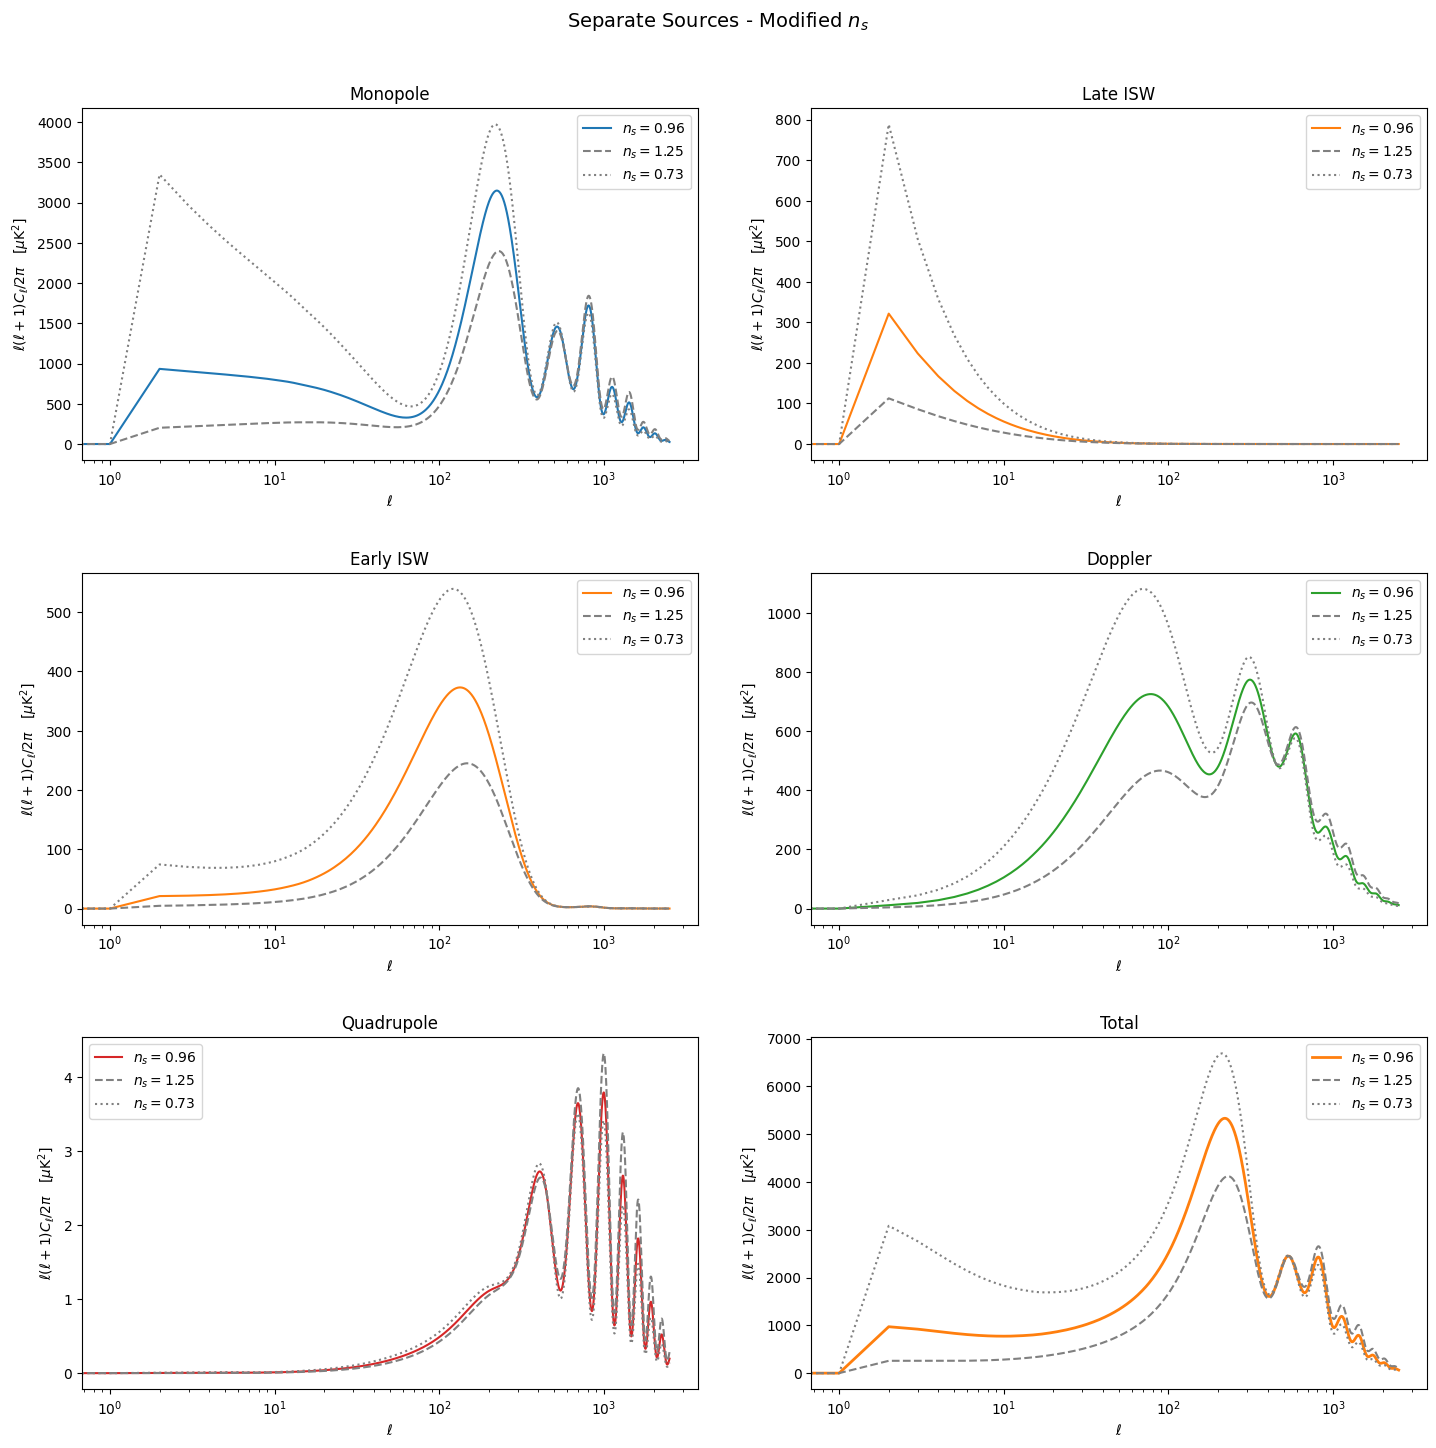

In [22]:
gs = gridspec.GridSpec(ncols=2, nrows=3)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Separate Sources - Modified $n_s$', fontsize=14)

#first plot
ax = fig.add_subplot(gs[0])
ax.semilogx(ls,dic['monxmon'], color='C0',label='$n_s=0.96$')
ax.semilogx(ls,dic5['monxmon'], ls='--',color='grey',label='$n_s=1.25$')
ax.semilogx(ls,dic55['monxmon'], ls='dotted',color='grey',label='$n_s=0.73$')
ax.set_title('Monopole')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[1], sharex=ax)
ax.semilogx(ls,dic['LISWxLISW'], color='C1',label='$n_s=0.96$')
ax.semilogx(ls,dic5['LISWxLISW'], ls='--',color='grey',label='$n_s=1.25$')
ax.semilogx(ls,dic55['LISWxLISW'], ls='dotted',color='grey',label='$n_s=0.73$')
ax.set_title('Late ISW')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[2], sharex=ax)
ax.semilogx(ls,dic['eISWxeISW'], color='C1',label='$n_s=0.96$')
ax.semilogx(ls,dic5['eISWxeISW'], ls='--',color='grey',label='$n_s=1.25$')
ax.semilogx(ls,dic55['eISWxeISW'], ls='dotted',color='grey',label='$n_s=0.73$')
ax.set_title('Early ISW')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[3], sharex=ax)
ax.semilogx(ls,dic['dopxdop'],color='C2',label='$n_s=0.96$')
ax.semilogx(ls,dic5['dopxdop'], ls='--',color='grey',label='$n_s=1.25$')
ax.semilogx(ls,dic55['dopxdop'], ls='dotted',color='grey',label='$n_s=0.73$')
ax.set_title('Doppler')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[4], sharex=ax)
ax.semilogx(ls,dic['QxQ'], color='C3',label='$n_s=0.96$')
ax.semilogx(ls,dic5['QxQ'], ls='--',color='grey',label='$n_s=1.25$')
ax.semilogx(ls,dic55['QxQ'], ls='dotted',color='grey',label='$n_s=0.73$')
ax.set_title('Quadrupole')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()


ax = fig.add_subplot(gs[5], sharex=ax)
ax.semilogx(ls,dic['TxT'], lw=2, color='C1',label='$n_s=0.96$')
ax.semilogx(ls,dic5['TxT'], ls='--',color='grey',label='$n_s=1.25$')
ax.semilogx(ls,dic55['TxT'], ls='dotted',color='grey',label='$n_s=0.73$')
ax.set_title('Total')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()


fig.tight_layout(pad=3.0)

With bigger $n_s$ we see a general dampening of big scales wrt small scales (left side vs right side) and vice versa

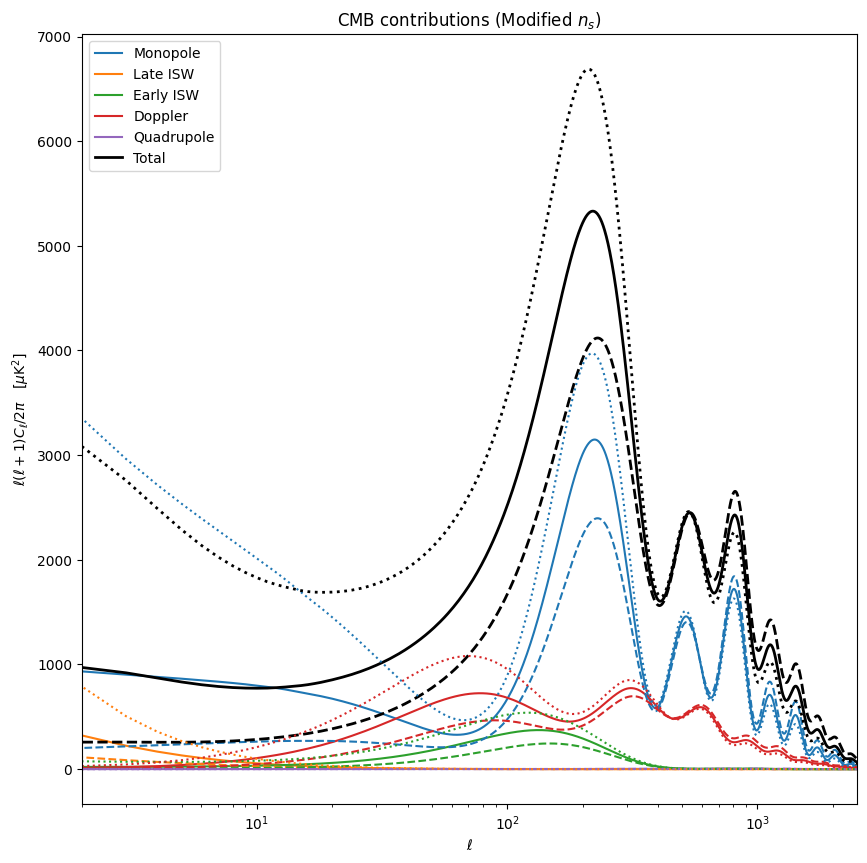

In [23]:
ls =np.arange(dic['TxT'].shape[0])
plt.figure(figsize=(10,10))
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic['LISWxLISW'], color='C1')
plt.semilogx(ls,dic['eISWxeISW'], color='C2')
plt.semilogx(ls,dic['dopxdop'],color='C3')
plt.semilogx(ls,dic['QxQ'], color='C4')
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.semilogx(ls,dic5['monxmon'], ls='--', color='C0')
plt.semilogx(ls,dic5['LISWxLISW'],ls='--', color='C1')
plt.semilogx(ls,dic5['eISWxeISW'],ls='--', color='C2')
plt.semilogx(ls,dic5['dopxdop'],ls='--',color='C3')
plt.semilogx(ls,dic5['QxQ'],ls='--', color='C4')
plt.semilogx(ls,dic5['TxT'],ls='--', lw=2, color='k')
plt.semilogx(ls,dic55['monxmon'], ls='dotted', color='C0')
plt.semilogx(ls,dic55['LISWxLISW'],ls='dotted', color='C1')
plt.semilogx(ls,dic55['eISWxeISW'],ls='dotted', color='C2')
plt.semilogx(ls,dic55['dopxdop'],ls='dotted',color='C3')
plt.semilogx(ls,dic55['QxQ'],ls='dotted', color='C4')
plt.semilogx(ls,dic55['TxT'],ls='dotted', lw=2, color='k')
plt.xlabel('$\ell$')
cl_label= r'$\ell(\ell+1)C_\ell/2\pi\quad [\mu {\rm K}^2]$'
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Late ISW','Early ISW','Doppler','Quadrupole', 'Total'], loc = 'upper left');
plt.title('CMB contributions (Modified $n_s$)');

With bigger $n_s$ we see a general dampening of big scales wrt small scales (left side vs right side) and vice versa

### Variation of $A_s$


A_s parametrizes the amplitude of primordial perturbation, thus if we vary it we are rescaling globally the amplitude of the power spectrum.

In [24]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=3e-9, ns=0.965, r=0)

early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
## I set the custom sources
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

data6= camb.get_results(pars)
dic6 = data6.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

In [25]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=1e-9, ns=0.965, r=0)

early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
## I set the custom sources
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

data66= camb.get_results(pars)
dic66 = data66.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

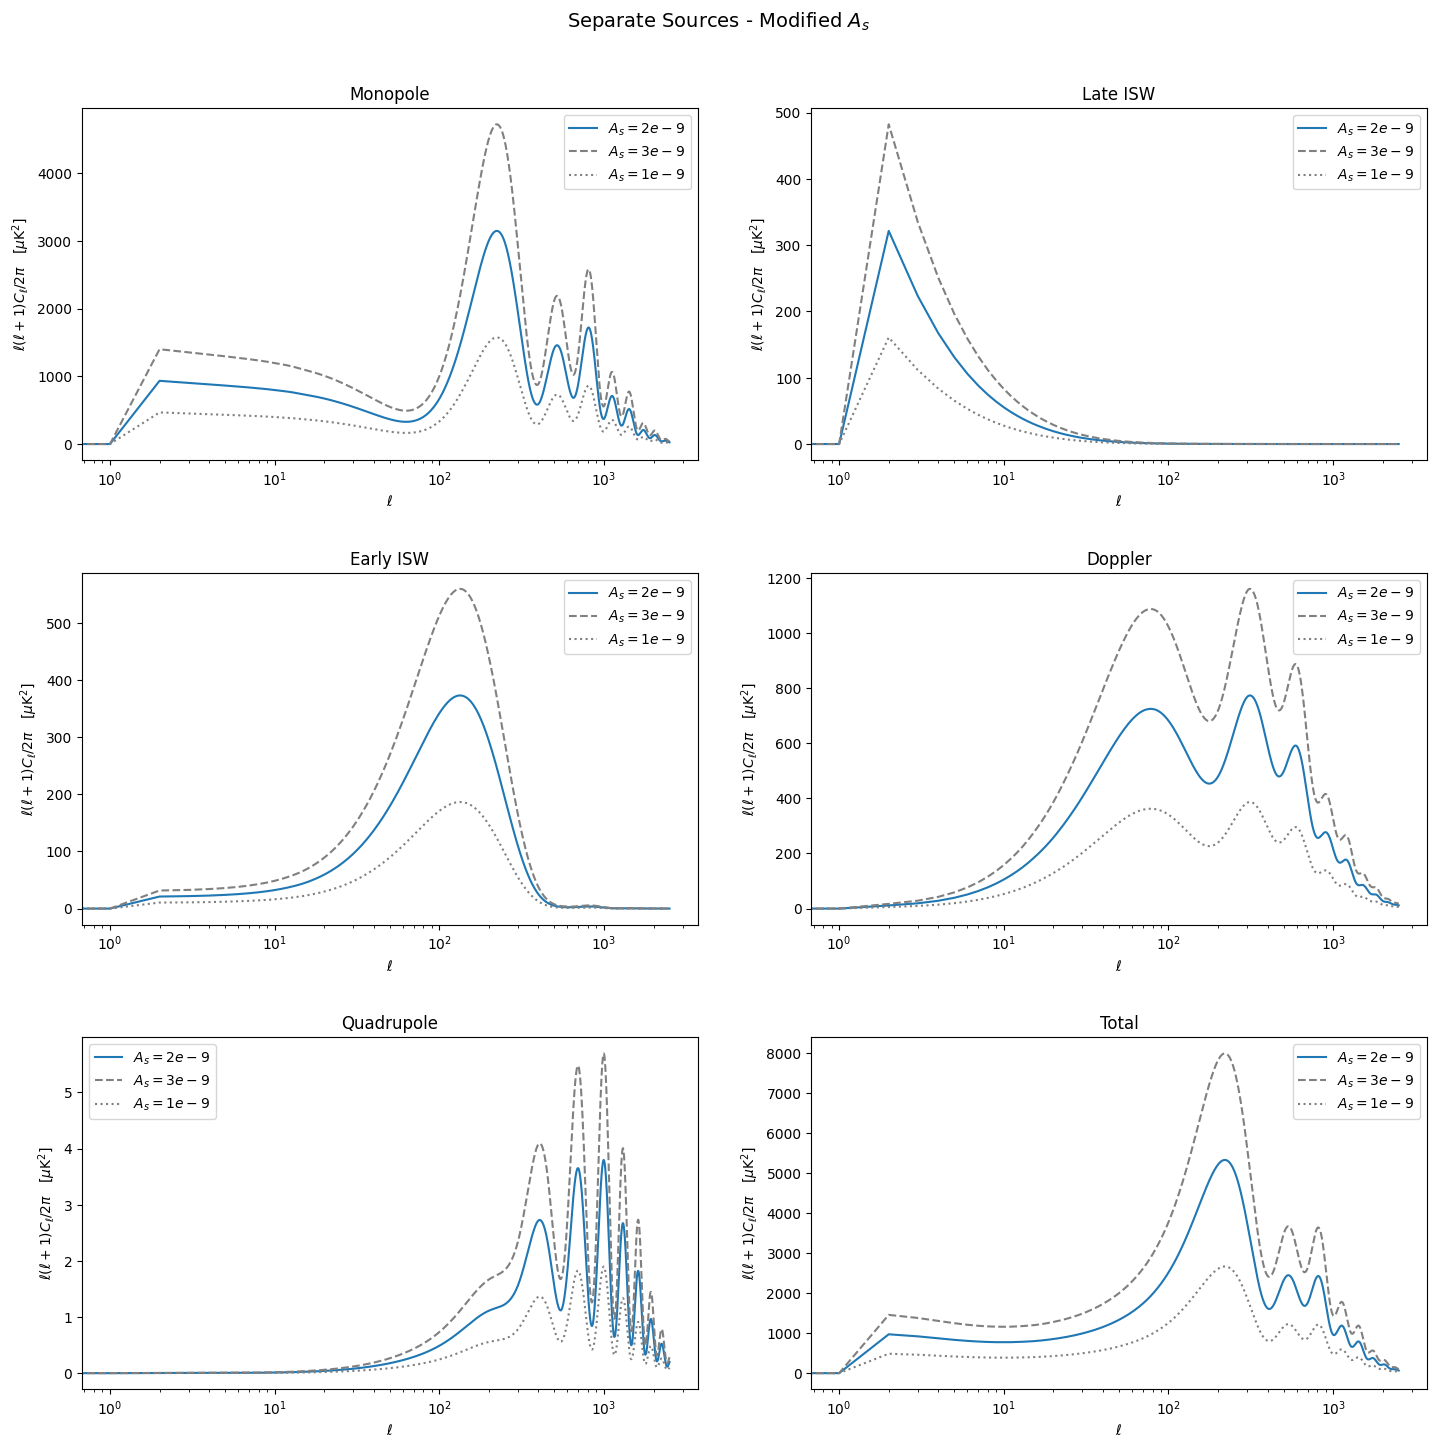

In [26]:
gs = gridspec.GridSpec(ncols=2, nrows=3)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Separate Sources - Modified $A_s$', fontsize=14)

#first plot
ax = fig.add_subplot(gs[0])
ax.semilogx(ls,dic['monxmon'], color='C0', label='$A_s=2e-9$')
ax.semilogx(ls,dic6['monxmon'], ls='--',color='grey', label='$A_s=3e-9$')
ax.semilogx(ls,dic66['monxmon'], ls='dotted',color='grey', label='$A_s=1e-9$')
ax.set_title('Monopole')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[1], sharex=ax)
ax.semilogx(ls,dic['LISWxLISW'], color='C0', label='$A_s=2e-9$')
ax.semilogx(ls,dic6['LISWxLISW'], ls='--',color='grey', label='$A_s=3e-9$')
ax.semilogx(ls,dic66['LISWxLISW'], ls='dotted',color='grey', label='$A_s=1e-9$')
ax.set_title('Late ISW')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[2], sharex=ax)
ax.semilogx(ls,dic['eISWxeISW'], color='C0', label='$A_s=2e-9$')
ax.semilogx(ls,dic6['eISWxeISW'], ls='--',color='grey', label='$A_s=3e-9$')
ax.semilogx(ls,dic66['eISWxeISW'], ls='dotted',color='grey', label='$A_s=1e-9$')
ax.set_title('Early ISW')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[3], sharex=ax)
ax.semilogx(ls,dic['dopxdop'], color='C0', label='$A_s=2e-9$')
ax.semilogx(ls,dic6['dopxdop'], ls='--',color='grey', label='$A_s=3e-9$')
ax.semilogx(ls,dic66['dopxdop'], ls='dotted',color='grey', label='$A_s=1e-9$')
ax.set_title('Doppler')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[4], sharex=ax)
ax.semilogx(ls,dic['QxQ'], color='C0', label='$A_s=2e-9$')
ax.semilogx(ls,dic6['QxQ'], ls='--',color='grey', label='$A_s=3e-9$')
ax.semilogx(ls,dic66['QxQ'], ls='dotted',color='grey', label='$A_s=1e-9$')
ax.set_title('Quadrupole')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[5], sharex=ax)
ax.semilogx(ls,dic['TxT'], color='C0', label='$A_s=2e-9$')
ax.semilogx(ls,dic6['TxT'], ls='--',color='grey', label='$A_s=3e-9$')
ax.semilogx(ls,dic66['TxT'], ls='dotted',color='grey', label='$A_s=1e-9$')
ax.set_title('Total')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()


fig.tight_layout(pad=3.0)

More primoridal fluctuation amplitude => more of everything

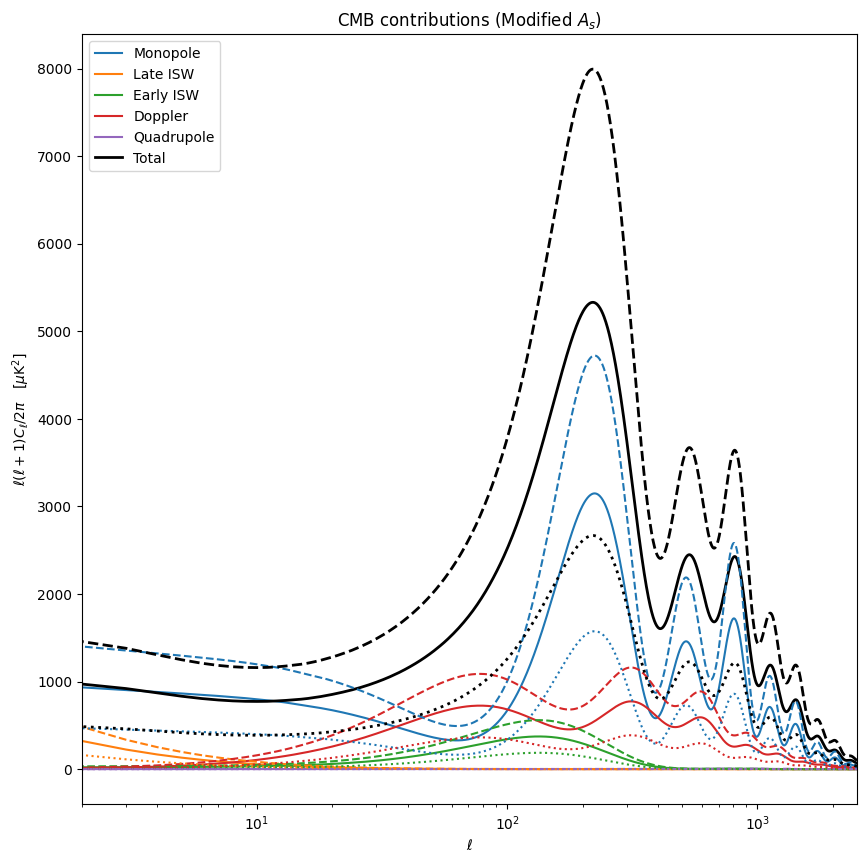

In [27]:
ls =np.arange(dic['TxT'].shape[0])
plt.figure(figsize=(10,10))
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic['LISWxLISW'], color='C1')
plt.semilogx(ls,dic['eISWxeISW'], color='C2')
plt.semilogx(ls,dic['dopxdop'],color='C3')
plt.semilogx(ls,dic['QxQ'], color='C4')
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.semilogx(ls,dic6['monxmon'], ls='--', color='C0')
plt.semilogx(ls,dic6['LISWxLISW'],ls='--', color='C1')
plt.semilogx(ls,dic6['eISWxeISW'],ls='--', color='C2')
plt.semilogx(ls,dic6['dopxdop'],ls='--',color='C3')
plt.semilogx(ls,dic6['QxQ'],ls='--', color='C4')
plt.semilogx(ls,dic6['TxT'],ls='--', lw=2, color='k')
plt.semilogx(ls,dic66['monxmon'], ls='dotted', color='C0')
plt.semilogx(ls,dic66['LISWxLISW'],ls='dotted', color='C1')
plt.semilogx(ls,dic66['eISWxeISW'],ls='dotted', color='C2')
plt.semilogx(ls,dic66['dopxdop'],ls='dotted',color='C3')
plt.semilogx(ls,dic66['QxQ'],ls='dotted', color='C4')
plt.semilogx(ls,dic66['TxT'],ls='dotted', lw=2, color='k')
plt.xlabel('$\ell$')
cl_label= r'$\ell(\ell+1)C_\ell/2\pi\quad [\mu {\rm K}^2]$'
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Late ISW','Early ISW','Doppler','Quadrupole', 'Total'], loc = 'upper left');
plt.title('CMB contributions (Modified $A_s$)');

More primoridal fluctuation amplitude => more of everything

### Variation of $\tau$

Variations in the optical depth rescale the power spectrum on scales smaller than the horizon at reionization, that is on multipoles smaller than $l\simeq 10$ => somewhata degenerate with $A_s$ => polarization measurements are needed

In [28]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.125)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)

early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
## I set the custom sources
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

data7= camb.get_results(pars)
dic7 = data7.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

In [29]:
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.005)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)

early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
## I set the custom sources
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source],
        source_names =names)

data77= camb.get_results(pars)
dic77 = data77.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

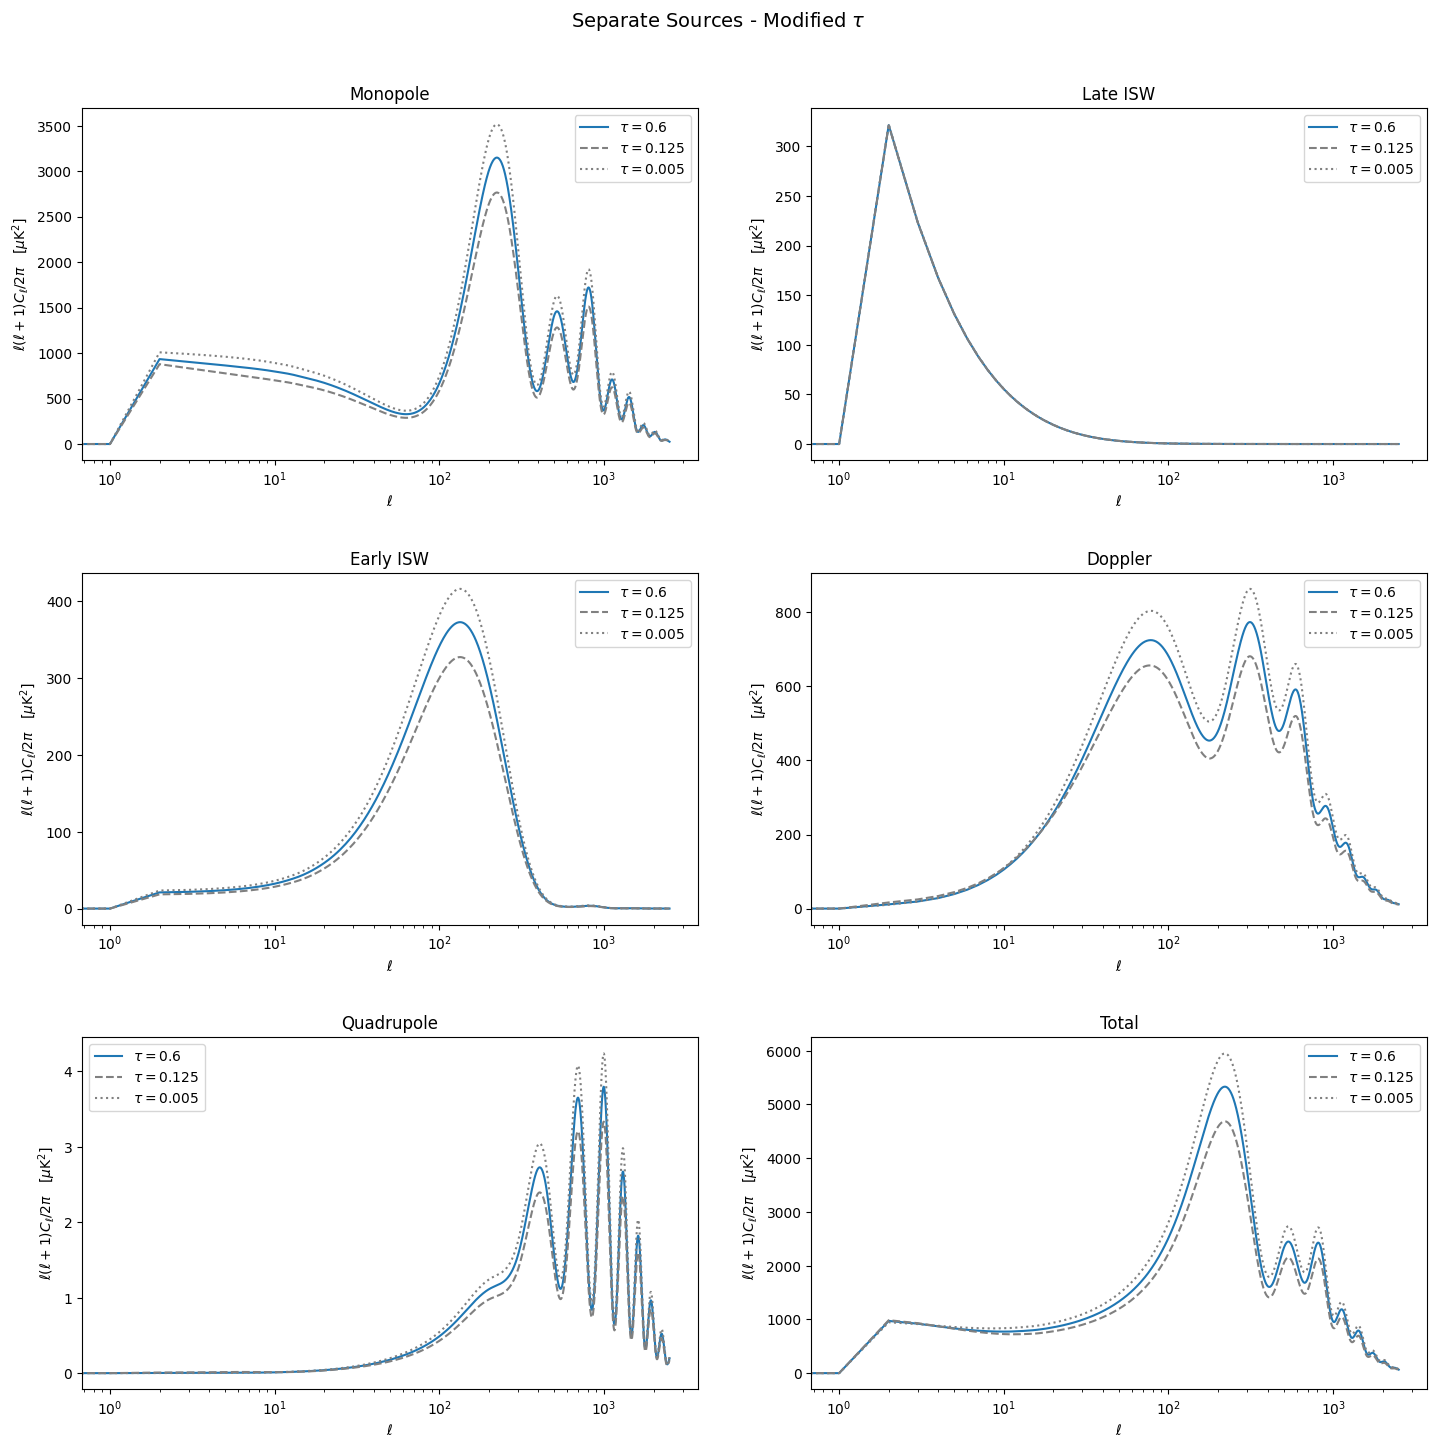

In [30]:
gs = gridspec.GridSpec(ncols=2, nrows=3)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Separate Sources - Modified $\\tau$', fontsize=14)

#first plot
ax = fig.add_subplot(gs[0])
ax.semilogx(ls,dic['monxmon'], color='C0',label='$\\tau=0.6$')
ax.semilogx(ls,dic7['monxmon'], ls='--',color='grey',label='$\\tau=0.125$')
ax.semilogx(ls,dic77['monxmon'], ls='dotted',color='grey',label='$\\tau=0.005$')
ax.set_title('Monopole')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[1], sharex=ax)
ax.semilogx(ls,dic['LISWxLISW'], color='C0',label='$\\tau=0.6$')
ax.semilogx(ls,dic7['LISWxLISW'], ls='--',color='grey',label='$\\tau=0.125$')
ax.semilogx(ls,dic77['LISWxLISW'], ls='dotted',color='grey',label='$\\tau=0.005$')
ax.set_title('Late ISW')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[2], sharex=ax)
ax.semilogx(ls,dic['eISWxeISW'], color='C0',label='$\\tau=0.6$')
ax.semilogx(ls,dic7['eISWxeISW'], ls='--',color='grey',label='$\\tau=0.125$')
ax.semilogx(ls,dic77['eISWxeISW'], ls='dotted',color='grey',label='$\\tau=0.005$')
ax.set_title('Early ISW')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[3], sharex=ax)
ax.semilogx(ls,dic['dopxdop'], color='C0',label='$\\tau=0.6$')
ax.semilogx(ls,dic7['dopxdop'], ls='--',color='grey',label='$\\tau=0.125$')
ax.semilogx(ls,dic77['dopxdop'], ls='dotted',color='grey',label='$\\tau=0.005$')
ax.set_title('Doppler')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[4], sharex=ax)
ax.semilogx(ls,dic['QxQ'], color='C0',label='$\\tau=0.6$')
ax.semilogx(ls,dic7['QxQ'], ls='--',color='grey',label='$\\tau=0.125$')
ax.semilogx(ls,dic77['QxQ'], ls='dotted',color='grey',label='$\\tau=0.005$')
ax.set_title('Quadrupole')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

ax = fig.add_subplot(gs[5], sharex=ax)
ax.semilogx(ls,dic['TxT'], color='C0',label='$\\tau=0.6$')
ax.semilogx(ls,dic7['TxT'], ls='--',color='grey',label='$\\tau=0.125$')
ax.semilogx(ls,dic77['TxT'], ls='dotted',color='grey',label='$\\tau=0.005$')
ax.set_title('Total')
ax.set_xlabel('$\ell$')
ax.set_ylabel(cl_label, size =10)
plt.legend()

fig.tight_layout(pad=3.0)

More $\tau$ gives

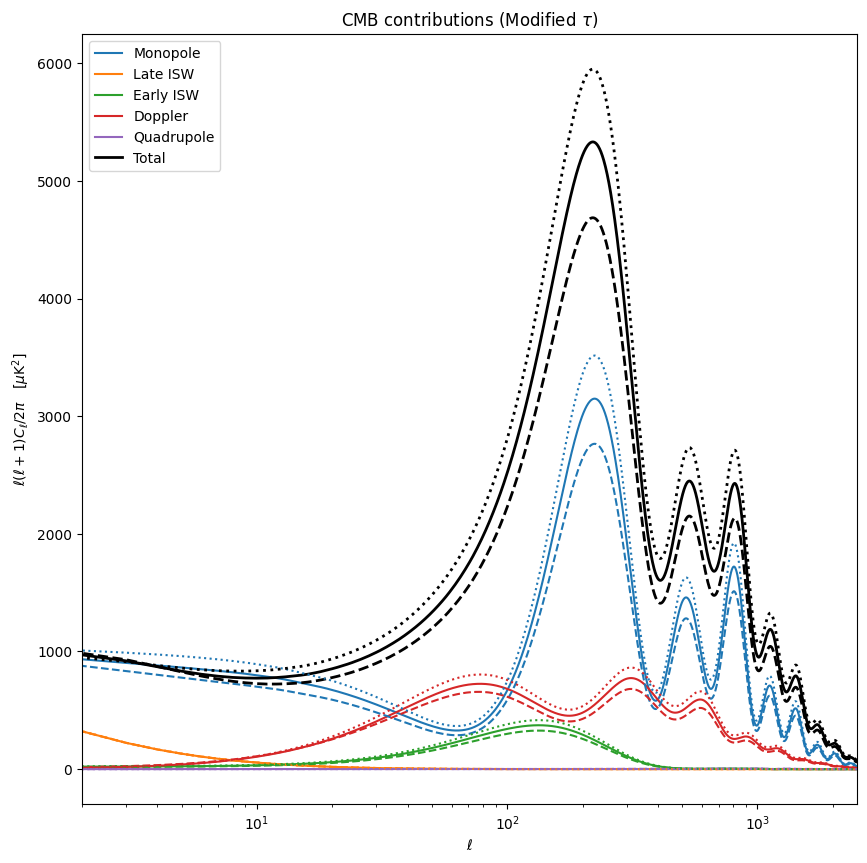

In [31]:
ls =np.arange(dic['TxT'].shape[0])
plt.figure(figsize=(10,10))
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic['LISWxLISW'], color='C1')
plt.semilogx(ls,dic['eISWxeISW'], color='C2')
plt.semilogx(ls,dic['dopxdop'],color='C3')
plt.semilogx(ls,dic['QxQ'], color='C4')
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.semilogx(ls,dic7['monxmon'], ls='--', color='C0')
plt.semilogx(ls,dic7['LISWxLISW'],ls='--', color='C1')
plt.semilogx(ls,dic7['eISWxeISW'],ls='--', color='C2')
plt.semilogx(ls,dic7['dopxdop'],ls='--',color='C3')
plt.semilogx(ls,dic7['QxQ'],ls='--', color='C4')
plt.semilogx(ls,dic7['TxT'],ls='--', lw=2, color='k')
plt.semilogx(ls,dic77['monxmon'], ls='dotted', color='C0')
plt.semilogx(ls,dic77['LISWxLISW'],ls='dotted', color='C1')
plt.semilogx(ls,dic77['eISWxeISW'],ls='dotted', color='C2')
plt.semilogx(ls,dic77['dopxdop'],ls='dotted',color='C3')
plt.semilogx(ls,dic77['QxQ'],ls='dotted', color='C4')
plt.semilogx(ls,dic77['TxT'],ls='dotted', lw=2, color='k')
plt.xlabel('$\ell$')
cl_label= r'$\ell(\ell+1)C_\ell/2\pi\quad [\mu {\rm K}^2]$'
plt.ylabel(cl_label)
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Late ISW','Early ISW','Doppler','Quadrupole', 'Total'], loc = 'upper left');
plt.title('CMB contributions (Modified $\\tau$)');